In [1]:
#importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings

In [2]:
# Load data
df = pd.read_csv("E:/CodeAlphaInternship/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#information
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [4]:
#Statistics
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


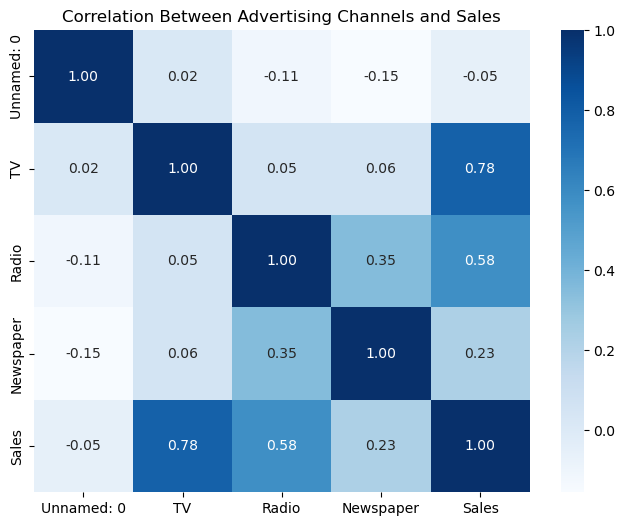

In [6]:
# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Between Advertising Channels and Sales')
plt.show()

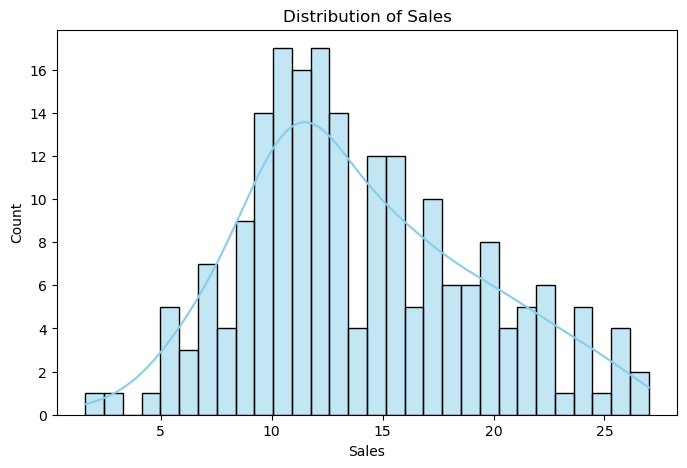

In [7]:
# Distribution of sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.show()

In [8]:
# Drop the first column (index column)
df = df.drop(columns=df.columns[0])

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.3f}")

Linear Regression Results:
MAE: 1.46
MSE: 3.17
RMSE: 1.78
R² Score: 0.899


In [11]:
# Random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.3f}")


Random Forest Results:
MAE: 0.62
MSE: 0.59
RMSE: 0.77
R² Score: 0.981


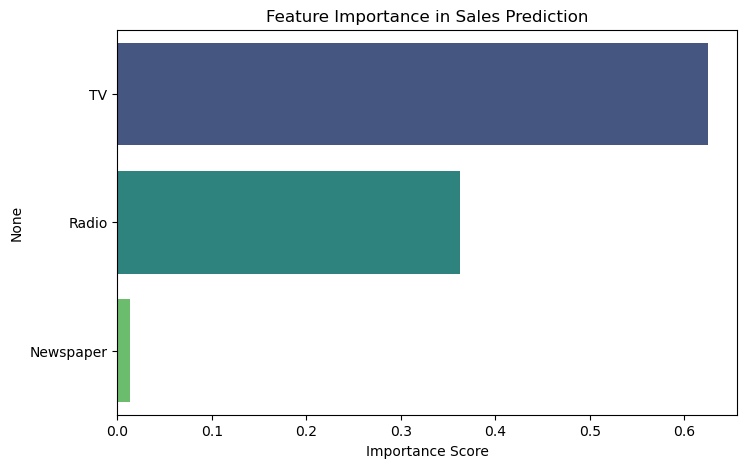

In [15]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, hue=features, palette='viridis', legend=False)
plt.title('Feature Importance in Sales Prediction')
plt.xlabel('Importance Score')
plt.show()

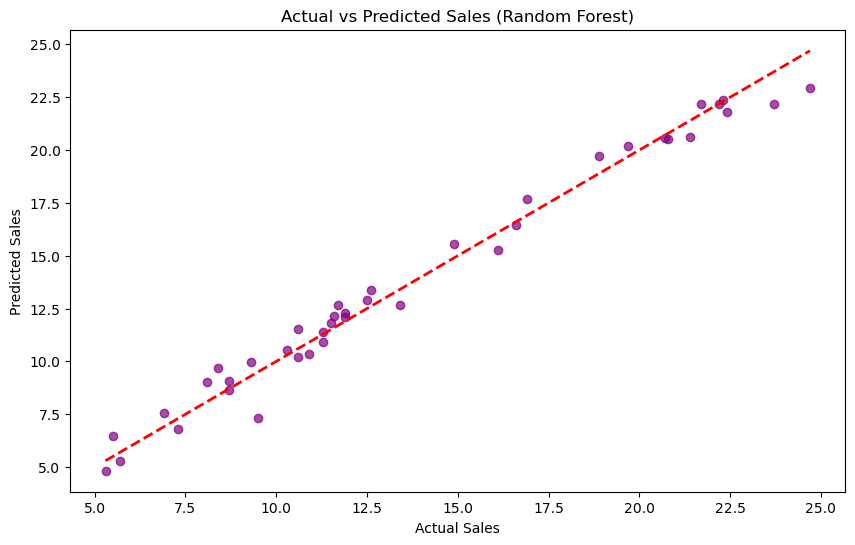

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()

In [14]:
# Save Random Forest model (better performance)
joblib.dump(rf, 'sales_prediction_model.pkl')
joblib.dump(X.columns.tolist(), 'sales_feature_names.pkl')
print("Model saved as 'sales_prediction_model.pkl'")

Model saved as 'sales_prediction_model.pkl'
